In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from  sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('trains.csv',usecols = ['Age','Fare','Survived'])

df['Age'].fillna(df['Age'].mean(),inplace =True)
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


C:\Users\vinay\AppData\Local\Temp\ipykernel_12412\1351890934.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


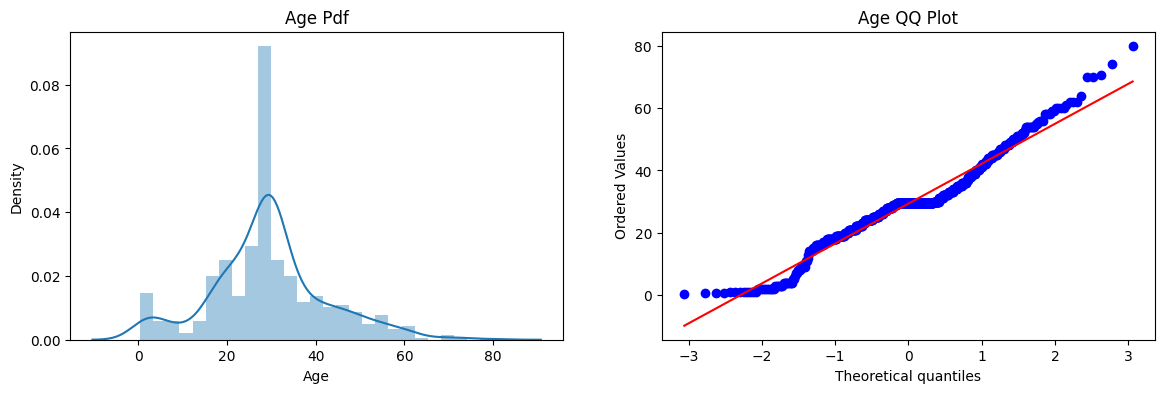

,Age,Fare
445,4.000000,81.8583
650,29.699118,7.8958
172,1.000000,11.1333
450,36.000000,27.7500
314,43.000000,26.2500
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [110]:
x= df.iloc[:,1:3]
y = df.iloc[:,0]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(x_train['Age'],dist = 'norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()
x_train

C:\Users\vinay\AppData\Local\Temp\ipykernel_12412\2555260207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


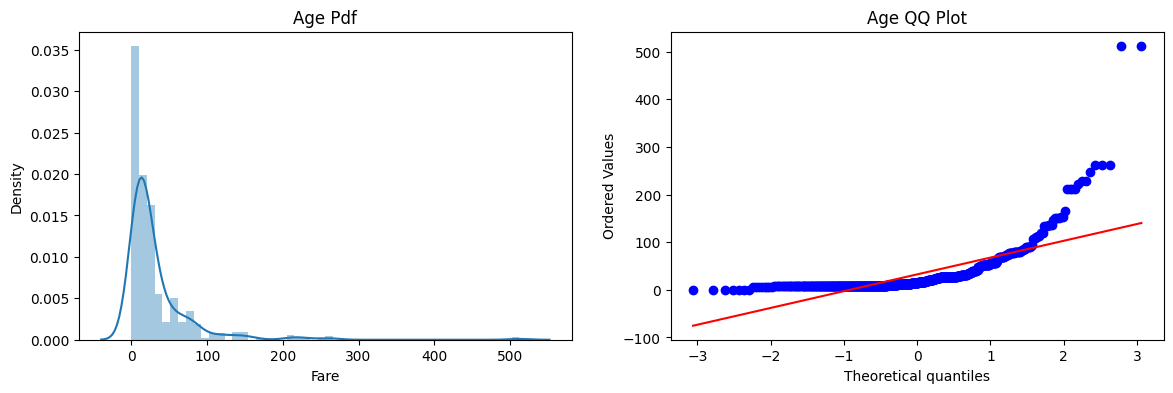

,Age,Fare
857,51.000000,26.5500
52,49.000000,76.7292
386,1.000000,46.9000
124,54.000000,77.2875
578,29.699118,14.4583
549,8.000000,36.7500
118,24.000000,247.5208
12,20.000000,8.0500
157,30.000000,8.0500
127,24.000000,7.1417


In [109]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()
x_train.head(10)

         Age       Fare
0   4.417132   4.000000
1   2.185579  29.699118
2   2.495954   1.000000
3   3.358638  36.000000
4   3.305054  43.000000
5   5.039951  38.000000
6   3.305054  31.000000
7   2.202765  29.000000
8   2.230014  18.000000
9   2.775709  29.699118
10  4.717456  39.000000
11  2.639057  39.000000
12  2.268252  26.000000


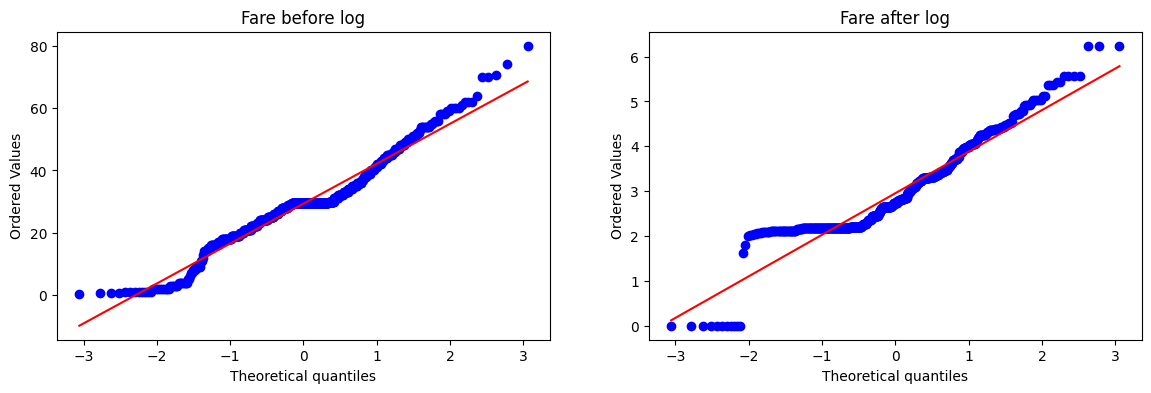

In [133]:

 
trf = ColumnTransformer([
('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')
x_train1 =trf.fit_transform(x_train)
  

x_train1 = pd.DataFrame(x_train1, columns=x_train.columns)
print(x_train1.head(13))   
x_test1 =trf.fit_transform(x_train)
clf = LogisticRegression()
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(x_train1['Age'],dist='norm',plot=plt)
plt.title('Fare after log')
plt.show()

        Age       Fare
0  40.92915   4.000000
1   3.94790  29.699118
2   5.56665   1.000000
3  13.87500  36.000000
4  13.12500  43.000000
5  76.73125  38.000000
6  13.12500  31.000000
7   4.02500  29.000000
8   4.15000  18.000000
9   7.52500  29.699118


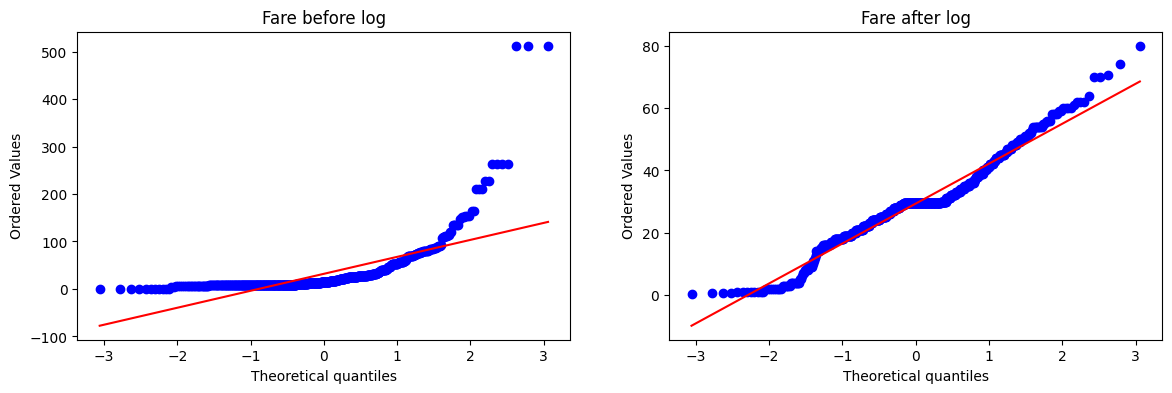

In [131]:
apply_transform(lambda x:x**1/2)